$ Pregunta \ 2 $

$a)$ Para esta pregunta lo que haremos será implementar un ejemplo en donde la regresión logística logré capturar el
sobreentrenamiento a medida que se van aumentando los coeficientes polinomiales. Mostraremos el espacio de caracteristicas
junto a la regresión respectiva y además de eso mostraremos los rendimientos de entrenamientos y de testeo. 

Para calcular la regresión logistica lo que haremos es utilizar el método del gradiente. En la pregunta 3 se volverá a implementar este metodo:

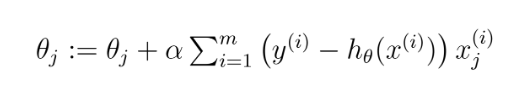

donde: 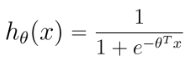

In [1]:
import math
import time
import random
import matplotlib.pyplot as plt

In [2]:
def producto_punto(x_1, x_2):
    suma = 0
    for i in range(len(x_1)):
        suma = suma + x_1[i]*x_2[i]
    return suma

In [3]:
def funcion_h(theta, x):
    valor = producto_punto(theta, x)
    c = 700
    if valor >= c:
        return 1
    elif valor <= -c:
        return 0
    else:
        resultado = 1/(1 + math.exp(-valor))
        return resultado

In [4]:
# Sean vectores en R^n y m muestras    [[y_1, x^(1)], ..., [y_m, x^(m)]]
# theta es un vector de R^n

def una_iteracion(theta, datos):
    nuevo_theta = []
    for k in range(len(theta)):
        suma = 0
        for i in range(len(datos)):
            suma = suma + (datos[i][0] - funcion_h(theta, datos[i][1]))*datos[i][1][k]
        suma = suma + theta[k]
        nuevo_theta.append(suma)
    return nuevo_theta

In [5]:
def calcular_regresion_logistica(theta_inicial, datos, T):
    theta = theta_inicial
    for t in range(T):
        theta = una_iteracion(theta, datos)
    return theta

In [6]:
def transformacion_punto(punto, d):
    lista = []
    lista.append(1)
    for i in range(d):
        lista.append(punto[0]**(i+1))
    lista.append(punto[1])
    return lista

In [7]:
def metodo_regresion_logistica(d, T):
    
    datos_entrenamiento = []
    
    for k1 in puntos_positivos_entrenamiento:
        datos_entrenamiento.append([1, transformacion_punto(k1, d)])

    for k2 in puntos_negativos_entrenamiento:
        datos_entrenamiento.append([-1, transformacion_punto(k2, d)])
        
    theta_0 = []
           
    for p in range(d+2):
        theta_0.append(p)

    resultado = calcular_regresion_logistica(theta_0, datos_entrenamiento, T)
    
    lista_coeficientes = []

    for i in range(d+1):
        lista_coeficientes.append(-resultado[i]/resultado[d+1])
    
    eje_x = []
    eje_y = []

    for i in range(100):
        eje_x.append(-2+i*0.04)

    for j in eje_x:
        suma = 0
        for k in range(len(lista_coeficientes)):
            suma = suma + lista_coeficientes[k]*(j**k)
        eje_y.append(suma)
        
    return [eje_x, eje_y, resultado, datos_entrenamiento]

In [8]:
def calcular_error(resultado, datos):

    suma = 0
    contador = 0

    for k in datos:
        if (producto_punto(k[1], resultado) >= 0 and k[0] == 1) or (producto_punto(k[1], resultado) <= 0 and k[0] == -1):
            suma = suma + 1
        contador = contador + 1
    
    porcentaje = 100*(suma/contador)
    return porcentaje

In [9]:
def creacion_datos_testeo(d):

    datos_testeo= []

    for k1 in puntos_positivos_testeo:
        datos_testeo.append([1, transformacion_punto(k1, d)])

    for k2 in puntos_negativos_testeo:
        datos_testeo.append([-1, transformacion_punto(k2, d)])
    
    return datos_testeo

In [10]:
#CREACION DE LOS PUNTOS A UTILIZAR

puntos_totales = []

for i in range(20):
    for j in range(20):
        puntos_totales.append([-2 + i*0.2, -2 + j*0.2])

puntos_positivos = []
puntos_negativos = []

for k in puntos_totales:
    if k[1]>=k[0]:
        if k[1] <= - k[0]:
            puntos_positivos.append(k)
        else:
            puntos_negativos.append(k)
    else:
        if k[1] >= - k[0]:
            puntos_positivos.append(k)
        else:
            puntos_negativos.append(k)

p_p_x = []
p_p_y = []

for k1 in puntos_positivos:
    p_p_x.append(k1[0])
    p_p_y.append(k1[1])
    
p_n_x = []
p_n_y = []

for k2 in puntos_negativos:
    p_n_x.append(k2[0])
    p_n_y.append(k2[1])

$ $

Ahora mostramos los puntos totales que se quieren clasificar. Se eligirán algunos de estos puntos para entrenamiento y otros para el testeo. Los puntos de color rojo se consideran como positivos (+1) y los puntos de color rojo se consideran como negativos (-1).

$ $

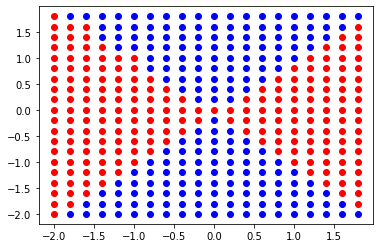

In [11]:
plt.plot(p_p_x, p_p_y, 'ro', color = "red")
plt.plot(p_n_x, p_n_y, 'ro', color = "blue")
plt.show()

In [12]:
# SEPARACION DATOS DE ENTRENAMIENTO Y TESTEO

random.seed(100)

M = 20

puntos_positivos_entrenamiento = random.choices(puntos_positivos, k=M)
puntos_positivos_testeo = []

puntos_negativos_entrenamiento = random.choices(puntos_negativos, k=M)
puntos_negativos_testeo = []

for k in puntos_positivos:
    if not(k in puntos_positivos_entrenamiento):
        puntos_positivos_testeo.append(k)

for j in puntos_negativos:
    if not(j in puntos_negativos_entrenamiento):
        puntos_negativos_testeo.append(j)

p_p_e_x = []
p_p_e_y = []

p_n_e_x = []
p_n_e_y = []

for k1 in puntos_positivos_entrenamiento:
    p_p_e_x.append(k1[0])
    p_p_e_y.append(k1[1])

for k2 in puntos_negativos_entrenamiento:
    p_n_e_x.append(k2[0])
    p_n_e_y.append(k2[1])


$ $

Ahora pasamos a mostrar los puntos que se utilizarán para entrenamiento.

$ $

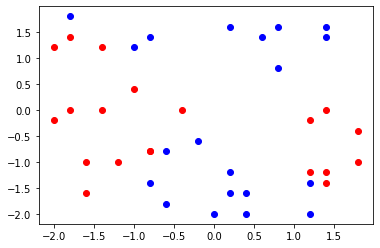

In [13]:
plt.plot(p_p_e_x, p_p_e_y, 'ro', color = "red")
plt.plot(p_n_e_x, p_n_e_y, 'ro', color = "blue")
plt.show()

$ $

Ahora, pasamos a graficar la regresión en conjunto con los datos de entrenamiento. Esto se graficará desde el grado
1 hasta el grado 7.

$ $

$ Grado \ 1 $

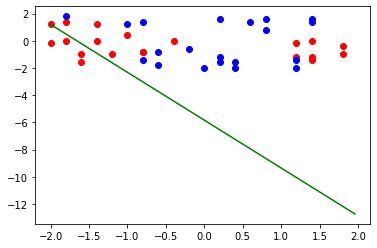

In [14]:
# GRAFICAR LOS 7 PRIMEROS GRADOS

d = 1
T = 100

output = metodo_regresion_logistica(d, T)

plt.plot(p_p_e_x, p_p_e_y, 'ro', color = "red")
plt.plot(p_n_e_x, p_n_e_y, 'ro', color = "blue")
plt.plot(output[0], output[1], '-', color = "green")
plt.show()

$ Grado \ 2 $

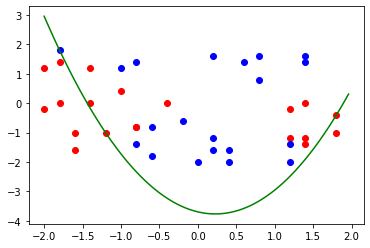

In [15]:
d = 2
T = 100

output = metodo_regresion_logistica(d, T)

plt.plot(p_p_e_x, p_p_e_y, 'ro', color = "red")
plt.plot(p_n_e_x, p_n_e_y, 'ro', color = "blue")
plt.plot(output[0], output[1], '-', color = "green")
plt.show()

$ Grado \ 3 $

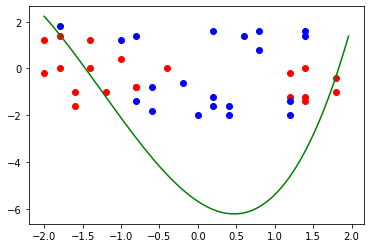

In [16]:
d = 3
T = 100

output = metodo_regresion_logistica(d, T)

plt.plot(p_p_e_x, p_p_e_y, 'ro', color = "red")
plt.plot(p_n_e_x, p_n_e_y, 'ro', color = "blue")
plt.plot(output[0], output[1], '-', color = "green")
plt.show()

$ Grado \ 4 $

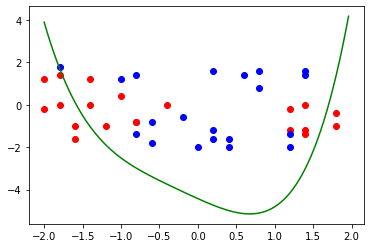

In [17]:
d = 4
T = 100

output = metodo_regresion_logistica(d, T)

plt.plot(p_p_e_x, p_p_e_y, 'ro', color = "red")
plt.plot(p_n_e_x, p_n_e_y, 'ro', color = "blue")
plt.plot(output[0], output[1], '-', color = "green")
plt.show()

$ Grado \ 5 $

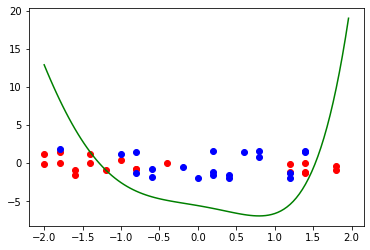

In [18]:
d = 5
T = 100

output = metodo_regresion_logistica(d, T)

plt.plot(p_p_e_x, p_p_e_y, 'ro', color = "red")
plt.plot(p_n_e_x, p_n_e_y, 'ro', color = "blue")
plt.plot(output[0], output[1], '-', color = "green")
plt.show()

$ Grado \ 6 $

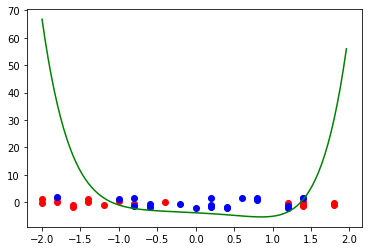

In [19]:
d = 6
T = 100

output = metodo_regresion_logistica(d, T)

plt.plot(p_p_e_x, p_p_e_y, 'ro', color = "red")
plt.plot(p_n_e_x, p_n_e_y, 'ro', color = "blue")
plt.plot(output[0], output[1], '-', color = "green")
plt.show()

$ Grado \ 7 $

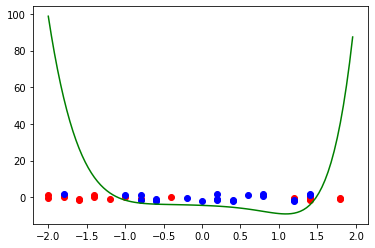

In [20]:
d = 7
T = 100

output = metodo_regresion_logistica(d, T)

plt.plot(p_p_e_x, p_p_e_y, 'ro', color = "red")
plt.plot(p_n_e_x, p_n_e_y, 'ro', color = "blue")
plt.plot(output[0], output[1], '-', color = "green")
plt.show()

In [21]:
T = 100
D = 10

start = time.time()

entrenamiento = []
testeo = []
eje_d = []

for d in range(1, D):
    output = metodo_regresion_logistica(d, T)
    rendimiento_entrenamiento = calcular_error(output[2], output[3])
    rendimiento_testeo = calcular_error(output[2], creacion_datos_testeo(d))
    
    eje_d.append(d)
    entrenamiento.append(rendimiento_entrenamiento)
    testeo.append(rendimiento_testeo)

end = time.time()

print("Tiempo de ejecucion: ", end-start)

Tiempo de ejecucion:  0.36305785179138184


$ $

$ Grafico \ \ porcentaje \ \ de \ \ acierto \ \ en \ \ entrenamiento $

Ahora pasamos a graficar el porcentaje de acierto en el entrenamiento a medida que se aumenta el grado polinomial. Graficamos desde el grado 1 hasta el grado 10. 

Como se observa al principio empieza a crecer este porcentaje y luego comienza a decrecer, así se observa claramente el sobreentrenamiento. 

$ $

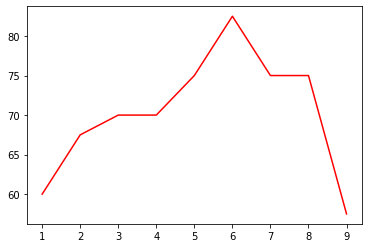

In [22]:
plt.plot(eje_d, entrenamiento, '-', color = "red")
plt.show()

$ $

$ Grafico \ \ porcentaje \ \ de \ \ acierto \ \ en \ \ testeo $

Ahora pasamos a graficar el porcentaje de acierto en el testeo a medida que se aumenta el grado polinomial. Graficamos desde el grado 1 hasta el grado 100. 

Como se observa al principio empieza a crecer este porcentaje y luego comienza a decrecer, así se observa claramente el sobreentrenamiento. 

$ $

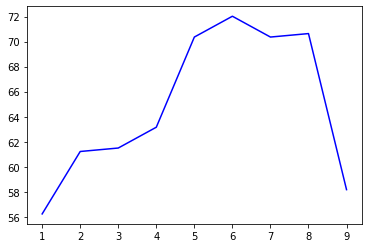

In [23]:
plt.plot(eje_d, testeo, '-', color = "blue")
plt.show()

$ $

$ Porcentaje \ \ promedio $

Ahora graficaremos el porcentaje promedio entre acierto en testeo y entrenamiento para obtener un "idea" de optimo.

$ $

In [24]:
# Ahora busquemos una especie de optimo

porcentajes = []

for i in range(len(entrenamiento)):
    porcentajes.append((entrenamiento[i] + testeo[i])/2)

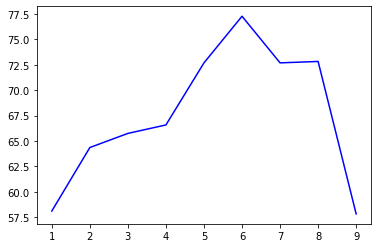

In [25]:
plt.plot(eje_d, porcentajes, '-', color = "blue")
plt.show()

In [26]:
ind_max_porcentaje = porcentajes.index(max(porcentajes))
print("El polinomio optimo es el de grado: ", eje_d[ind_max_porcentaje])
print("Con un acierto porcentual promedio de: ", max(porcentajes))

El polinomio optimo es el de grado:  6
Con un acierto porcentual promedio de:  77.26108033240997


$ $

$ b) $ 

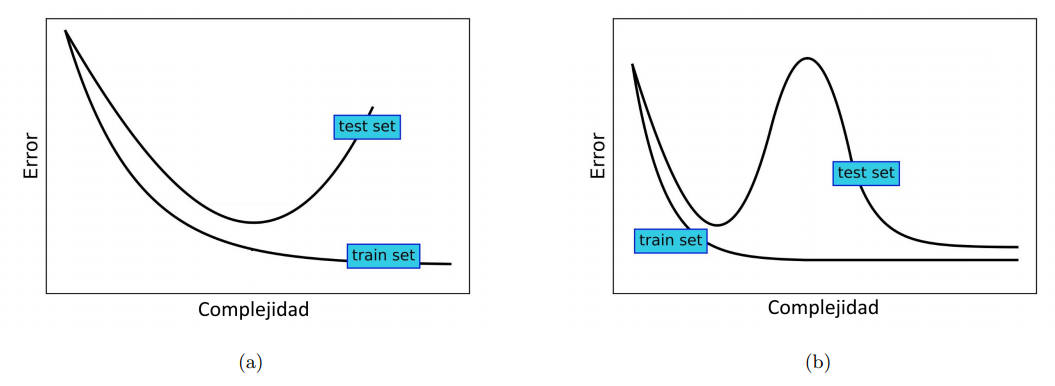

$ $

Considerando que en el caso de la segunda curva no hay errores en los datos ni en el modelo, entonces nuestra hipotesis
de porque pasa este fenomeno es:
    
Al principio de la curva para el grafico de test se da una "U" porque se esta capturando el sobreentrenamiento (que es lo clásico que pasa) y luego comienza a decrecer el error debido a que hay un punto que se podría llamar "umbral de realidad" que a partir de ese punto en adelante el modelo es cada vez mejor porque hay tanto sobreentrenamiento que lo que realmente estamos viendo es la realidad derechamente.

$ $

In [27]:
#------------------------------

$ c) $ Primero que todo notemos que normalmente nosotros lo que estamos haciendo es minimizar una función de error $ E(x) $ convexa:

$ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \min E(x) $

Notemos que esta función va desde $ R^d $ hasta $ R $. Pero como sabemos este minimización no esta considerando el sobreentrenamiento y esto se considera a través de lo que se denomina "Regularizada" y lo que hace esto es sumar a la función de error convexa el termino $ \lambda \cdot n $ donde $ n $ es la cantidad de variables de entrada y donde $ \lambda $ es una constante mayor a $0$. Así nos queda la siguiente función:

$ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ f(x, n) = E(x)  + \lambda \cdot n $

Notemos que esta función va desde $ R^d \times R $ hacia $ R $. De este modo el nuevo problema a resolver es:

$ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \min_{n, x} f(x, n) = \min_{n, x} [E(x) + \lambda \cdot n] $

Ahora para verificar que podemos encontrar un minimo debemos mostrar que $ f(x,n) $ es convexa. 

Sea un $ t \in [0, 1] $ arbitrario, entonces si consideramos a los puntos $ (x_1, n_1) $ y $ (x_2, n_2) $ tenemos que:

$ $

$ f[t \cdot (x_1, n_1) + (1-t) \cdot (x_2, n_2)] = f(t \cdot x_1 + (1-t) \cdot x_2, t \cdot n_1 + (1-t) \cdot n_2) = E( t \cdot x_1 + (1-t) \cdot x_2) + \lambda \cdot (t \cdot n_1 + (1-t) \cdot n_2)   $


$ =  E( t \cdot x_1 + (1-t) \cdot x_2) + t \cdot (\lambda \cdot n_1) + (1-t) \cdot ( \lambda \cdot n_2) $

Por convexidad de $ E $:

$ \leq t \cdot E(x_1) + (1-t) \cdot E(x_2) + t \cdot (\lambda \cdot n_1) + (1-t) \cdot ( \lambda \cdot n_2) = t \cdot [E(x_1) + \lambda \cdot n_1] + (1-t) \cdot [E(x_2) + \lambda \cdot n_2] = t \cdot f(x_1, n_1) + (1-t) \cdot f(x_2, n_2) $ 

$ $

De esta forma:

$ $

$  f[t \cdot (x_1, n_1) + (1-t) \cdot (x_2, n_2)] \leq t \cdot f(x_1, n_1) + (1-t) \cdot f(x_2, n_2) $ 

Así notemos que como se demostro esto para un $ t \in [0,1] $ arbitrario, entonces demostramos que $ f(x,n) $ es convexa. 

$ $

Ahora debemos hacer una analisis sobre el $ \lambda $ que se utiliza. 

$ $

Si $ \lambda $ es muy chico entonces al minimizar $ f(x, n) = E(x)  + \lambda \cdot n $ vamos a estar privilegeando solamente minimizar $ E(x) $. 

Si $ \lambda $ es muy grande entonces al minimizar $ f(x, n) = E(x)  + \lambda \cdot n $ vamos a estar privilegeando solamente minimizar $ n $. 

$ $

De esta forma, si queremos tanto minimizar $ E(x) $ como $ n $ entonces lo que debemos hacer es calibrar el $ \lambda $. 

$ $

Para lograr este objetivo, en la literatura existen muchas formas:

$ $

Una forma es simplemente ir probando con distintos valores de $ \lambda $. 

Otra forma es una vez que ya se calcularon los $E(x)$ definir $ \lambda = \frac{Promedio \ de \ E(x)}{Promedio \ de \ n } $.

$ $ 

Pero como mencionamos, existen más formas de lograr este objetivo según distintas literaturas. 

$ $

$ d) \ (Bonus) $ El sesgo inductivo que tiene el modelo del item anterior es que debemos indicar que preferimos minimizar (a través del valor de $\lambda$) ya sea $ E(x) $ o $n$. 

La relación con los sesgos inductivos de la pregunta 1$b)$ es que debemos elegir al igual que en ese caso que cosa privilegiaremos. 